In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

In [2]:
df = pd.read_csv('predict_rating.csv')

In [3]:
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [5]:
df['mfr'].value_counts()

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

In [6]:
mfr_mapping = {'K' : 0 , 'G' : 1, 'P': 2, 'R': 3, 'Q': 4, 'N': 5, 'A': 6}
type_mapping = {'C': 0, 'H': 1}

In [7]:
df['mfr'] = df['mfr'].map(mfr_mapping)
df['type'] = df['type'].map(type_mapping)

In [8]:
df.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

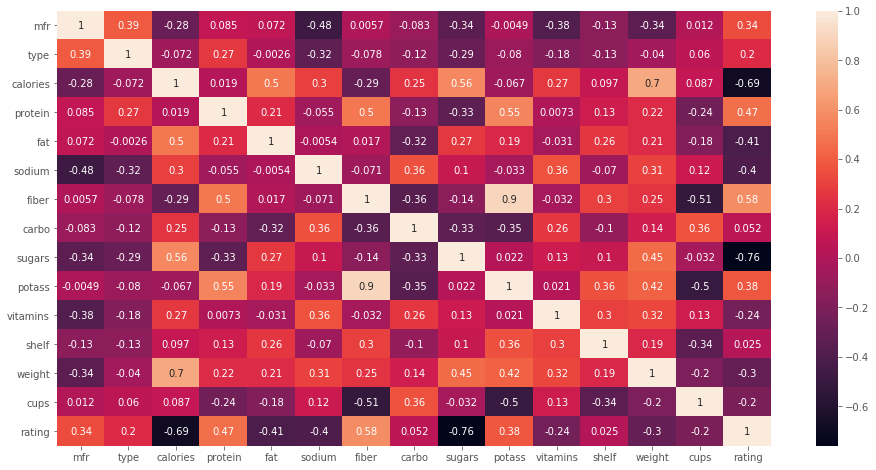

In [9]:
plt.figure(figsize=(16,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

In [10]:
# we will remove features which has highly negative correlation with our label
df.drop(['calories', 'sugars'], axis=1, inplace=True)

In [11]:
X = df.drop(['name', 'rating'], axis=1)
y = df['rating'] 

In [12]:
def get_scaled_data(df, scaler):
    scaled_features = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
    return scaled_df

In [13]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
scaled_X = get_scaled_data(X, ms)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
X_train.shape, y_train.shape

((57, 12), (57,))

In [16]:
X_test.shape, y_test.shape

((20, 12), (20,))

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [18]:
def get_score(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [19]:
lr_score = get_score(LinearRegression(), X_train, y_train, X_test, y_test)
ridge_score = get_score(Ridge(), X_train, y_train, X_test, y_test)
lasso_score = get_score(Lasso(), X_train, y_train, X_test, y_test)

In [20]:
print("LinearRegression Score: ", lr_score*100)
print("Ride Regression Score: ", ridge_score*100)
print("Lasso Regression", lasso_score*100) 

LinearRegression Score:  92.532926190541
Ride Regression Score:  89.43991269237861
Lasso Regression 86.51988977451778


In [21]:
cross_val_score(LinearRegression(), scaled_X, y, cv=5).mean()

0.8358943407345215

In [22]:
cross_val_score(Ridge(), scaled_X, y, cv=5).mean()

0.6256701591158195

In [23]:
cross_val_score(Lasso(), scaled_X, y, cv=5).mean()

0.03096637758344467